In [0]:
from pyspark.sql.functions import col
data_BASE_DIR = "dbfs:/mnt/mids-w261/"
display(dbutils.fs.ls(f"{data_BASE_DIR}"))
# Airline Data    
df_flights = spark.read.parquet(f"dbfs:/mnt/mids-w261/datasets_final_project_2022/parquet_airlines_data/")
# Weather data
df_weather = spark.read.parquet(f"dbfs:/mnt/mids-w261/datasets_final_project_2022/parquet_weather_data/")
# Stations data      
df_stations = spark.read.parquet(f"dbfs:/mnt/mids-w261/datasets_final_project_2022/stations_data/stations_with_neighbors.parquet/")



path,name,size,modificationTime
dbfs:/mnt/mids-w261/HW5/,HW5/,0,1752850182466
dbfs:/mnt/mids-w261/OTPW_12M/,OTPW_12M/,0,1752850182466
dbfs:/mnt/mids-w261/OTPW_1D_CSV/,OTPW_1D_CSV/,0,1752850182466
dbfs:/mnt/mids-w261/OTPW_36M/,OTPW_36M/,0,1752850182466
dbfs:/mnt/mids-w261/OTPW_3M/,OTPW_3M/,0,1752850182466
dbfs:/mnt/mids-w261/OTPW_3M_2015.csv,OTPW_3M_2015.csv,1500620247,1741625185000
dbfs:/mnt/mids-w261/OTPW_3M_2015_delta/,OTPW_3M_2015_delta/,0,1752850182466
dbfs:/mnt/mids-w261/OTPW_60M/,OTPW_60M/,0,1752850182466
dbfs:/mnt/mids-w261/OTPW_60M_Backup/,OTPW_60M_Backup/,0,1752850182466
dbfs:/mnt/mids-w261/airport-codes_csv.csv,airport-codes_csv.csv,6232459,1740508595000


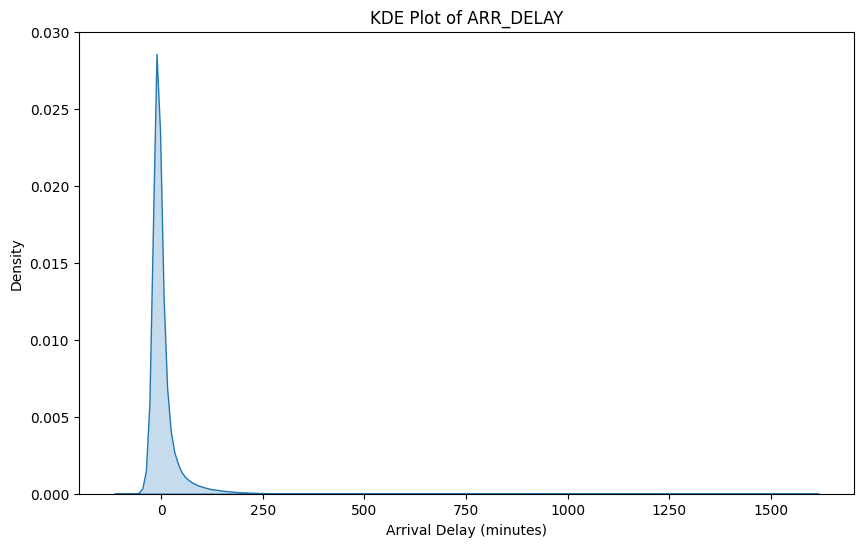

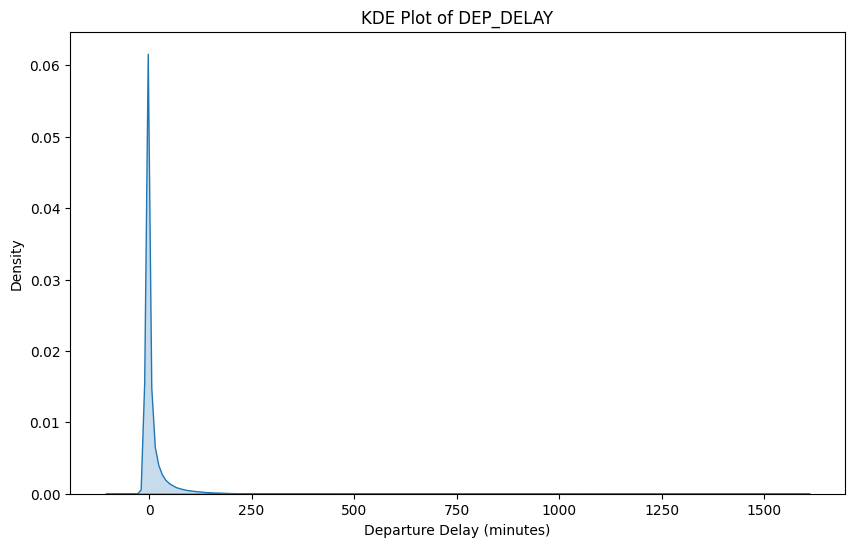

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pdf = df_flights.select("ARR_DELAY", "DEP_DELAY").dropna().sample(False, 0.01, seed=42).toPandas()

plt.figure(figsize=(10, 6))
sns.kdeplot(pdf["ARR_DELAY"], fill=True)
plt.title("KDE Plot of ARR_DELAY")
plt.xlabel("Arrival Delay (minutes)")
plt.ylabel("Density")
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(pdf["DEP_DELAY"], fill=True)
plt.title("KDE Plot of DEP_DELAY")
plt.xlabel("Departure Delay (minutes)")
plt.ylabel("Density")
plt.show()

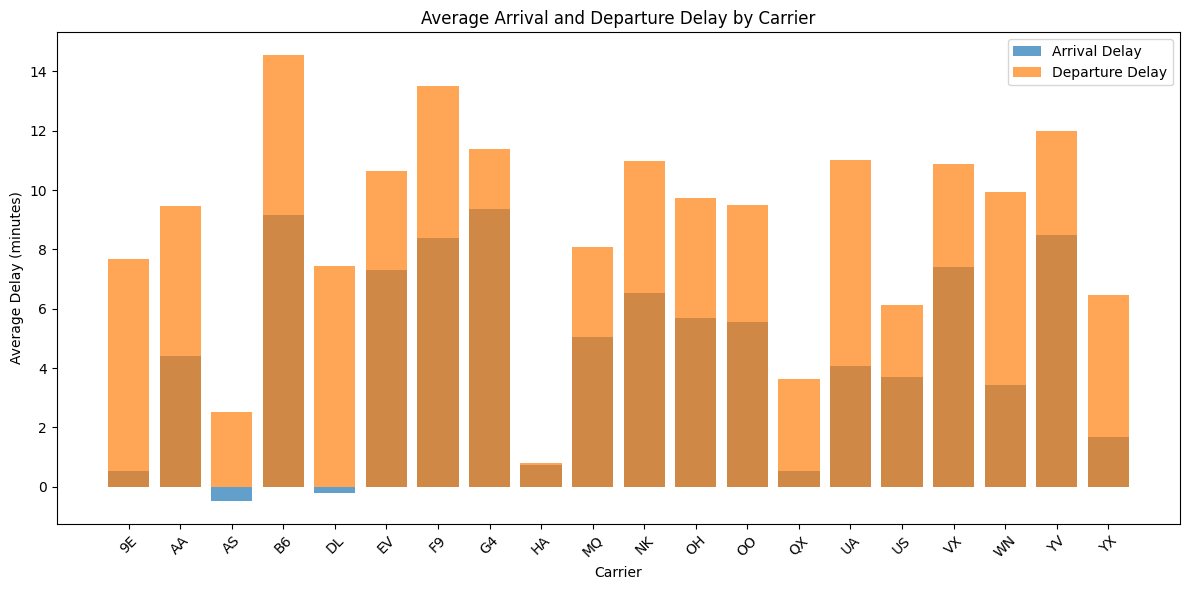

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

pdf_avg_delay = (
    df_flights
    .groupBy("OP_UNIQUE_CARRIER")
    .agg({"ARR_DELAY": "avg", "DEP_DELAY": "avg"})
    .withColumnRenamed("avg(ARR_DELAY)", "AVG_ARR_DELAY")
    .withColumnRenamed("avg(DEP_DELAY)", "AVG_DEP_DELAY")
    .orderBy("OP_UNIQUE_CARRIER")
    .toPandas()
)

plt.figure(figsize=(12, 6))
plt.bar(pdf_avg_delay["OP_UNIQUE_CARRIER"], pdf_avg_delay["AVG_ARR_DELAY"], alpha=0.7, label="Arrival Delay")
plt.bar(pdf_avg_delay["OP_UNIQUE_CARRIER"], pdf_avg_delay["AVG_DEP_DELAY"], alpha=0.7, label="Departure Delay")
plt.xlabel("Carrier")
plt.ylabel("Average Delay (minutes)")
plt.title("Average Arrival and Departure Delay by Carrier")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:
df_trends = (
    df_flights
    .groupBy("DAY_OF_WEEK", "MONTH")
    .agg(
        {"ARR_DELAY": "avg", "DEP_DELAY": "avg", "*": "count"}
    )
    .withColumnRenamed("avg(ARR_DELAY)", "AVG_ARR_DELAY")
    .withColumnRenamed("avg(DEP_DELAY)", "AVG_DEP_DELAY")
    .withColumnRenamed("count(1)", "FLIGHT_COUNT")
    .orderBy("MONTH", "DAY_OF_WEEK")
)

display(df_trends)

DAY_OF_WEEK,MONTH,FLIGHT_COUNT,AVG_ARR_DELAY,AVG_DEP_DELAY
1,1,885596,5.852569251042199,11.397712918715582
2,1,874873,1.5848200057157844,7.768080060798543
3,1,881903,1.1700715080506021,7.105880922747402
4,1,906862,2.109414542277273,7.91595589389155
5,1,912356,3.4749238106368443,9.049064666627824
6,1,713253,1.9576220966366513,8.453559481308634
7,1,833761,5.098425075491077,10.87584409648502
1,2,860286,4.604451321977344,10.0568196197002
2,2,788918,2.7897831928826737,8.386594592626025
3,2,799735,4.064513637609914,9.10672769301421


In [0]:
from pyspark.sql.functions import to_date, col, row_number
from pyspark.sql.window import Window

# Step 1: Extract weather date
df_weather = df_weather.withColumn("weather_date", to_date(col("DATE")))

# Step 2: Convert flight date
df_flights = df_flights.withColumn("flight_date", to_date(col("FL_DATE")))

# Step 3: Filter df_weather to only records matching city names
df_joined = df_flights.join(
    df_weather,
    (df_flights.flight_date == df_weather.weather_date) &
    (col("NAME").contains(col("ORIGIN_CITY_NAME").substr(1, 10))),  # Loose match on city name prefix
    how="inner"
)


# Need to create clean df before even running model. processing cannot handle such large amounts of data

In [0]:
import pyspark.sql.functions as F

# Step 1: Compute NULL counts per column
null_counts_row = df_flights.select([
    F.count(F.when(F.col(column).isNull(), column)).alias(column) 
    for column in df_flights.columns
]).first()

# Step 2: Identify columns with zero NULLs
non_null_cols = [col for col, null_count in null_counts_row.asDict().items() if null_count == 0]

# Step 3: Create new DataFrame with only non-null columns
df_no_null_cols = df_flights.select(non_null_cols)

# Optional: Check schema or display
df_no_null_cols.printSchema()
df_no_null_cols.show(5)
print("length:", df_no_null_cols.count())


root
 |-- QUARTER: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- FL_DATE: string (nullable = true)
 |-- OP_UNIQUE_CARRIER: string (nullable = true)
 |-- OP_CARRIER_AIRLINE_ID: integer (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- OP_CARRIER_FL_NUM: integer (nullable = true)
 |-- ORIGIN_AIRPORT_ID: integer (nullable = true)
 |-- ORIGIN_AIRPORT_SEQ_ID: integer (nullable = true)
 |-- ORIGIN_CITY_MARKET_ID: integer (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- ORIGIN_CITY_NAME: string (nullable = true)
 |-- ORIGIN_STATE_ABR: string (nullable = true)
 |-- ORIGIN_STATE_FIPS: integer (nullable = true)
 |-- ORIGIN_STATE_NM: string (nullable = true)
 |-- ORIGIN_WAC: integer (nullable = true)
 |-- DEST_AIRPORT_ID: integer (nullable = true)
 |-- DEST_AIRPORT_SEQ_ID: integer (nullable = true)
 |-- DEST_CITY_MARKET_ID: integer (nullable = true)
 |-- DEST:

In [0]:
from pyspark.sql.functions import col
data_BASE_DIR = "dbfs:/mnt/mids-w261/"
display(dbutils.fs.ls(f"{data_BASE_DIR}"))
# Airline Data    
df_flights1 = spark.read.parquet(f"dbfs:/mnt/mids-w261/datasets_final_project_2022/parquet_airlines_data_1y/")
# Weather data
df_weather1 = spark.read.parquet(f"dbfs:/mnt/mids-w261/datasets_final_project_2022/parquet_weather_data_1y/")
# Stations data      
#df_stations = spark.read.parquet(f"dbfs:/mnt/mids-w261/datasets_final_project_2022/stations_data/stations_with_neighbors.parquet/")
# OTPW
#df_otpw = spark.read.format("csv").option("header","true").load(f"dbfs:/mnt/mids-w261/OTPW_3M_2015.csv")
    

path,name,size,modificationTime
dbfs:/mnt/mids-w261/HW5/,HW5/,0,1752850207738
dbfs:/mnt/mids-w261/OTPW_12M/,OTPW_12M/,0,1752850207738
dbfs:/mnt/mids-w261/OTPW_1D_CSV/,OTPW_1D_CSV/,0,1752850207738
dbfs:/mnt/mids-w261/OTPW_36M/,OTPW_36M/,0,1752850207738
dbfs:/mnt/mids-w261/OTPW_3M/,OTPW_3M/,0,1752850207738
dbfs:/mnt/mids-w261/OTPW_3M_2015.csv,OTPW_3M_2015.csv,1500620247,1741625185000
dbfs:/mnt/mids-w261/OTPW_3M_2015_delta/,OTPW_3M_2015_delta/,0,1752850207738
dbfs:/mnt/mids-w261/OTPW_60M/,OTPW_60M/,0,1752850207738
dbfs:/mnt/mids-w261/OTPW_60M_Backup/,OTPW_60M_Backup/,0,1752850207738
dbfs:/mnt/mids-w261/airport-codes_csv.csv,airport-codes_csv.csv,6232459,1740508595000


In [0]:
df_flights1.columns

['QUARTER',
 'MONTH',
 'DAY_OF_MONTH',
 'DAY_OF_WEEK',
 'FL_DATE',
 'OP_UNIQUE_CARRIER',
 'OP_CARRIER_AIRLINE_ID',
 'OP_CARRIER',
 'TAIL_NUM',
 'OP_CARRIER_FL_NUM',
 'ORIGIN_AIRPORT_ID',
 'ORIGIN_AIRPORT_SEQ_ID',
 'ORIGIN_CITY_MARKET_ID',
 'ORIGIN',
 'ORIGIN_CITY_NAME',
 'ORIGIN_STATE_ABR',
 'ORIGIN_STATE_FIPS',
 'ORIGIN_STATE_NM',
 'ORIGIN_WAC',
 'DEST_AIRPORT_ID',
 'DEST_AIRPORT_SEQ_ID',
 'DEST_CITY_MARKET_ID',
 'DEST',
 'DEST_CITY_NAME',
 'DEST_STATE_ABR',
 'DEST_STATE_FIPS',
 'DEST_STATE_NM',
 'DEST_WAC',
 'CRS_DEP_TIME',
 'DEP_TIME',
 'DEP_DELAY',
 'DEP_DELAY_NEW',
 'DEP_DEL15',
 'DEP_DELAY_GROUP',
 'DEP_TIME_BLK',
 'TAXI_OUT',
 'WHEELS_OFF',
 'WHEELS_ON',
 'TAXI_IN',
 'CRS_ARR_TIME',
 'ARR_TIME',
 'ARR_DELAY',
 'ARR_DELAY_NEW',
 'ARR_DEL15',
 'ARR_DELAY_GROUP',
 'ARR_TIME_BLK',
 'CANCELLED',
 'CANCELLATION_CODE',
 'DIVERTED',
 'CRS_ELAPSED_TIME',
 'ACTUAL_ELAPSED_TIME',
 'AIR_TIME',
 'FLIGHTS',
 'DISTANCE',
 'DISTANCE_GROUP',
 'CARRIER_DELAY',
 'WEATHER_DELAY',
 'NAS_DELAY',
 'SE

In [0]:
df_weather1.columns

['STATION',
 'DATE',
 'LATITUDE',
 'LONGITUDE',
 'ELEVATION',
 'NAME',
 'REPORT_TYPE',
 'SOURCE',
 'HourlyAltimeterSetting',
 'HourlyDewPointTemperature',
 'HourlyDryBulbTemperature',
 'HourlyPrecipitation',
 'HourlyPresentWeatherType',
 'HourlyPressureChange',
 'HourlyPressureTendency',
 'HourlyRelativeHumidity',
 'HourlySkyConditions',
 'HourlySeaLevelPressure',
 'HourlyStationPressure',
 'HourlyVisibility',
 'HourlyWetBulbTemperature',
 'HourlyWindDirection',
 'HourlyWindGustSpeed',
 'HourlyWindSpeed',
 'Sunrise',
 'Sunset',
 'DailyAverageDewPointTemperature',
 'DailyAverageDryBulbTemperature',
 'DailyAverageRelativeHumidity',
 'DailyAverageSeaLevelPressure',
 'DailyAverageStationPressure',
 'DailyAverageWetBulbTemperature',
 'DailyAverageWindSpeed',
 'DailyCoolingDegreeDays',
 'DailyDepartureFromNormalAverageTemperature',
 'DailyHeatingDegreeDays',
 'DailyMaximumDryBulbTemperature',
 'DailyMinimumDryBulbTemperature',
 'DailyPeakWindDirection',
 'DailyPeakWindSpeed',
 'DailyPrecipit

In [0]:
df_weather1.select("SOURCE").show(5, truncate=False)

+------+
|SOURCE|
+------+
|4     |
|4     |
|4     |
|4     |
|4     |
+------+
only showing top 5 rows


In [0]:
df_flights1.select("ORIGIN_AIRPORT_ID").show(5, truncate=False)

+-----------------+
|ORIGIN_AIRPORT_ID|
+-----------------+
|14100            |
|13487            |
|14122            |
|12266            |
|10721            |
+-----------------+
only showing top 5 rows


In [0]:
from pyspark.sql.functions import regexp_extract, to_date, col

# Step 1: Extract state abbreviation from NAME 
df_weather_filtered = df_weather.filter(col("NAME").endswith("US"))
df_weather_filtered = df_weather_filtered.withColumn(
    "WEATHER_STATE_ABR",
    regexp_extract(col("NAME"), r", (\w{2}) US$", 1)
)

# Step 2: Convert DATE and FL_DATE to proper date format
df_weather_filtered = df_weather_filtered.withColumn("weather_date", to_date("DATE"))
df_flights = df_flights.withColumn("flight_date", to_date("FL_DATE"))

# Step 3: Join on state abbreviation and date
joined_df = df_flights.join(
    df_weather_filtered,
    (df_flights["ORIGIN_STATE_ABR"] == df_weather_filtered["WEATHER_STATE_ABR"]) &
    (df_flights["flight_date"] == df_weather_filtered["weather_date"]),
    how="left"
)

# Optional: Preview result
joined_df.select("FL_DATE", "ORIGIN", "ORIGIN_STATE_ABR", "NAME", "DATE").show(5, truncate=False)


+----------+------+----------------+----------------------------------+-------------------+
|FL_DATE   |ORIGIN|ORIGIN_STATE_ABR|NAME                              |DATE               |
+----------+------+----------------+----------------------------------+-------------------+
|2017-02-16|SMF   |CA              |RED BLUFF MUNICIPAL AIRPORT, CA US|2017-02-16T00:54:00|
|2017-02-16|SMF   |CA              |RED BLUFF MUNICIPAL AIRPORT, CA US|2017-02-16T01:54:00|
|2017-02-16|SMF   |CA              |RED BLUFF MUNICIPAL AIRPORT, CA US|2017-02-16T02:54:00|
|2017-02-16|SMF   |CA              |RED BLUFF MUNICIPAL AIRPORT, CA US|2017-02-16T03:54:00|
|2017-02-16|SMF   |CA              |RED BLUFF MUNICIPAL AIRPORT, CA US|2017-02-16T04:00:00|
+----------+------+----------------+----------------------------------+-------------------+
only showing top 5 rows


In [0]:
df_otpw = spark.read.format("csv").option("header","true").load(f"dbfs:/mnt/mids-w261/OTPW_12M/OTPW_12M/")
df_otpw.show(5)

+-------+------------+-----------+----------+-----------------+---------------------+----------+--------+-----------------+-----------------+---------------------+---------------------+------+--------------------+----------------+-----------------+---------------+----------+---------------+-------------------+-------------------+----+---------------+--------------+---------------+-------------+--------+------------+--------+---------+-------------+---------+---------------+------------+--------+----------+---------+-------+------------+--------+---------+-------------+---------+---------------+------------+---------+-----------------+--------+----------------+-------------------+--------+-------+--------+--------------+-------------+-------------+---------+--------------+-------------------+--------------+---------------+-----------------+----+-----+--------------------+--------------------+-----------------+----------------+-----------+-------------+-------------+------------------+--

In [0]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.sql.functions import col

# Step 1: Select relevant numeric columns
selected_cols = [
    "DEP_DELAY",            # Target
    "TAXI_OUT",
    "CRS_ELAPSED_TIME",
    "DISTANCE",
    "MONTH",
    "DAY_OF_MONTH",
    "DAY_OF_WEEK" 
]

# Step 2: Cast selected columns to float
for col_name in selected_cols:
    df_otpw = df_otpw.withColumn(col_name, col(col_name).cast("float"))

# Step 3: Drop rows with nulls in selected columns
df_clean = df_otpw.select(selected_cols).dropna()

# Step 4: Assemble features
assembler = VectorAssembler(
    inputCols=[col for col in selected_cols if col != "DEP_DELAY"],
    outputCol="features"
)
df_vector = assembler.transform(df_clean).select("features", "DEP_DELAY")

# Step 5: Train Linear Regression Model
lr = LinearRegression(featuresCol="features", labelCol="DEP_DELAY")
lr_model = lr.fit(df_vector)

# Step 6: Print model summary
training_summary = lr_model.summary
print("RMSE:", training_summary.rootMeanSquaredError)
print("R^2:", training_summary.r2)


RMSE: 36.89879943521466
R^2: 0.004498860942711902


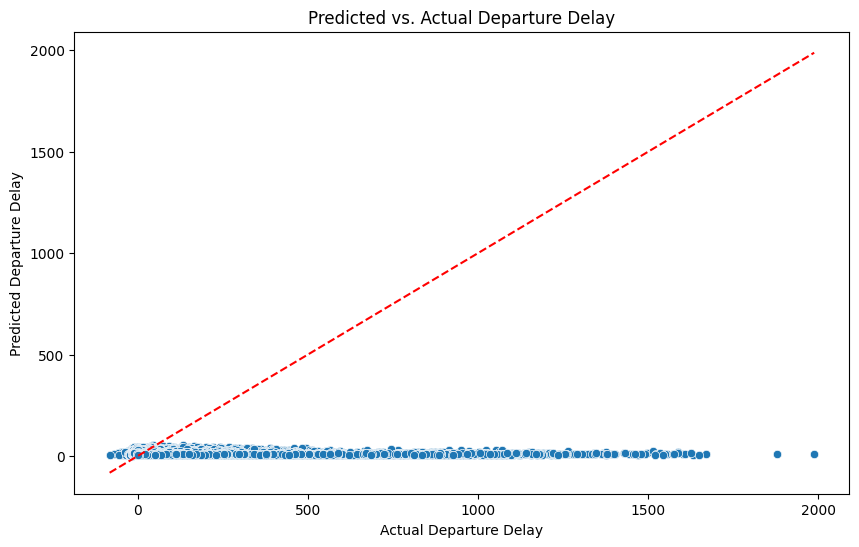

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
predictions = lr_model.transform(df_vector).select("DEP_DELAY", "prediction")
pred_pd = predictions.toPandas()
pred_pd["residuals"] = pred_pd["DEP_DELAY"] - pred_pd["prediction"]
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pred_pd["DEP_DELAY"], y=pred_pd["prediction"])
plt.plot([pred_pd["DEP_DELAY"].min(), pred_pd["DEP_DELAY"].max()],
         [pred_pd["DEP_DELAY"].min(), pred_pd["DEP_DELAY"].max()],
         color="red", linestyle="--")
plt.xlabel("Actual Departure Delay")
plt.ylabel("Predicted Departure Delay")
plt.title("Predicted vs. Actual Departure Delay")
plt.show()


In [0]:
df_otpw1 = spark.read.format("csv").option("header","true").load(f"dbfs:/mnt/mids-w261/OTPW_12M/OTPW_12M/")
df_otpw1.show(5)

In [0]:
from pyspark.sql.functions import col, pow, sqrt, to_date, row_number
from pyspark.sql.window import Window

#Read in airport codes file
df_airports = spark.read.format("csv").option("header", "true").load("dbfs:/mnt/mids-w261/airport-codes_csv.csv")

#Join flights with airport metadata on IATA airport code
df_flights_airports = df_flights1.join(
    df_airports,
    df_flights1["ORIGIN"] == df_airports["iata_code"],
    how="left"
)

#Cross join with stations and compute distance
df_joined = df_flights_airports.crossJoin(df_stations).withColumn(
    "distance",
    sqrt(
        pow(col("lat") - col("neighbor_lat"), 2) +
        pow(col("lon") - col("neighbor_lon"), 2)
    )
)

#Select the closest station per ORIGIN
windowSpec = Window.partitionBy("ORIGIN").orderBy("distance")
df_nearest = df_joined.withColumn("rank", row_number().over(windowSpec)).filter(col("rank") == 1)

#Prepare weather data for join
df_weather = df_weather1.withColumnRenamed("STATION", "STATION_ID")
df_weather = df_weather1.withColumn("weather_date", to_date("DATE"))

#Final join on closest weather station and date
df_final = df_nearest.join(
    df_weather,
    (df_nearest["neighbor_id"] == df_weather["STATION_ID"]) &
    (to_date(df_nearest["FL_DATE"]) == df_weather["weather_date"]),
    how="inner"
)
